In [163]:
import pandas as pd
import numpy as np

In [164]:
df = pd.read_csv('spam.csv')

In [165]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [166]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
598,ham,Will do. Was exhausted on train this morning. ...,NaN,NaN,NaN
3075,ham,"Mum, hope you are having a great day. Hoping t...",NaN,NaN,NaN
1815,ham,Sian... Aft meeting supervisor got work 2 do l...,NaN,NaN,NaN
4106,spam,HOT LIVE FANTASIES call now 08707500020 Just 2...,NaN,NaN,NaN
4091,ham,I remain unconvinced that this isn't an elabor...,NaN,NaN,NaN


In [167]:
df.shape

(5572, 5)

In [168]:
df['v1'].value_counts()

v1
ham     4825
spam     747
Name: count, dtype: int64

In [169]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation

# 1. Data Cleaning

In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [171]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [172]:
df.sample(5)

,v1,v2
3654,ham,Senthil group company Apnt 5pm.
1483,ham,Purity of friendship between two is not about ...
3844,ham,Mmmm.... I cant wait to lick it!
4114,ham,Sorry. You never hear unless you book it. One ...
4556,ham,I am in hospital da. . I will return home in e...


In [173]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [174]:
df.sample(5)

,target,text
113,spam,GENT! We are trying to contact you. Last weeke...
253,ham,"Ups which is 3days also, and the shipping comp..."
3521,ham,Im sorry bout last nite it wasn t ur fault it...
4317,ham,S...i will take mokka players only:)
1963,ham,Yes :)it completely in out of form:)clark also...


In [175]:
from sklearn.preprocessing import LabelEncoder

In [176]:
le = LabelEncoder()

In [177]:
df['target'] = le.fit_transform(df['target'])

In [178]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [179]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [180]:
df.duplicated().sum()

410

In [181]:
df = df.drop_duplicates(keep='first')

In [182]:
df.duplicated().sum()

0

In [183]:
df.shape

(5162, 2)

# 2. EDA

In [184]:
df['target'].value_counts()

target
0    4516
1     646
Name: count, dtype: int64

In [185]:
import matplotlib.pyplot as plt

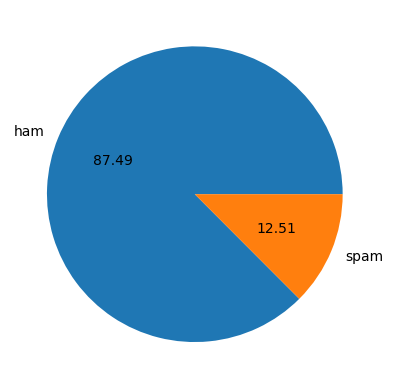

In [186]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [187]:
import nltk

In [188]:
df['num_characters'] = df['text'].apply(len)

In [189]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [190]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [191]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [192]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [193]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [194]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5162.000000,5162.00000,5162.000000
mean,78.763851,18.44382,1.962999
std,58.142892,13.34107,1.446986
min,2.000000,1.00000,1.000000
25%,36.000000,9.00000,1.000000
50%,60.000000,15.00000,1.000000
75%,116.000000,26.00000,2.000000
max,910.000000,220.00000,38.000000


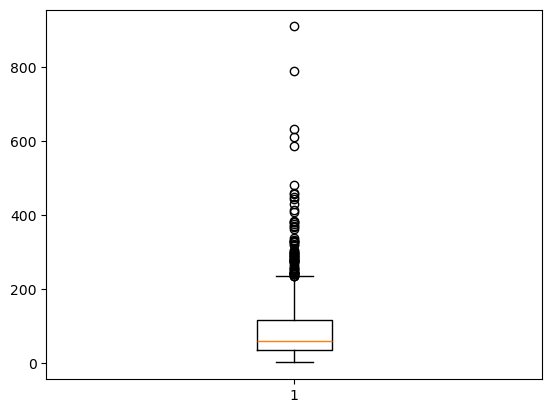

In [195]:
plt.boxplot([df['num_characters']])
plt.show()

In [196]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.428919,17.127325,1.820416
std,56.356310,13.504667,1.383286
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [197]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,646.000000,646.000000,646.000000
mean,137.030960,27.647059,2.959752
std,30.513064,7.109937,1.490514
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,156.750000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [198]:
import seaborn as sns

/media/somil/Ubuntu1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/media/somil/Ubuntu1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

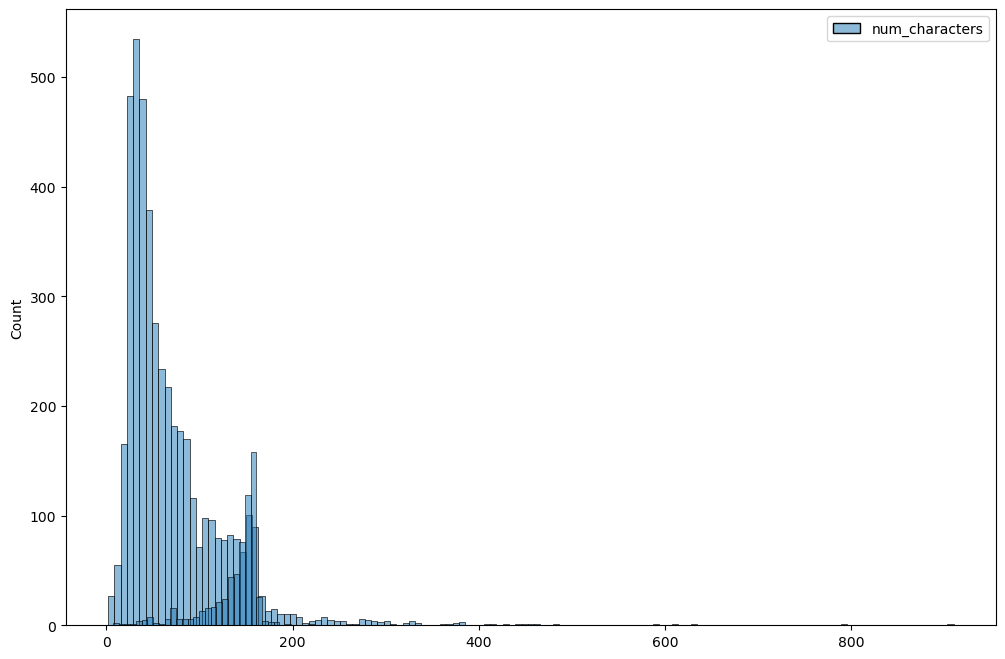

In [199]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0][['num_characters']])
sns.histplot(df[df['target'] == 1][['num_characters']],color='red')

/media/somil/Ubuntu1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/media/somil/Ubuntu1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

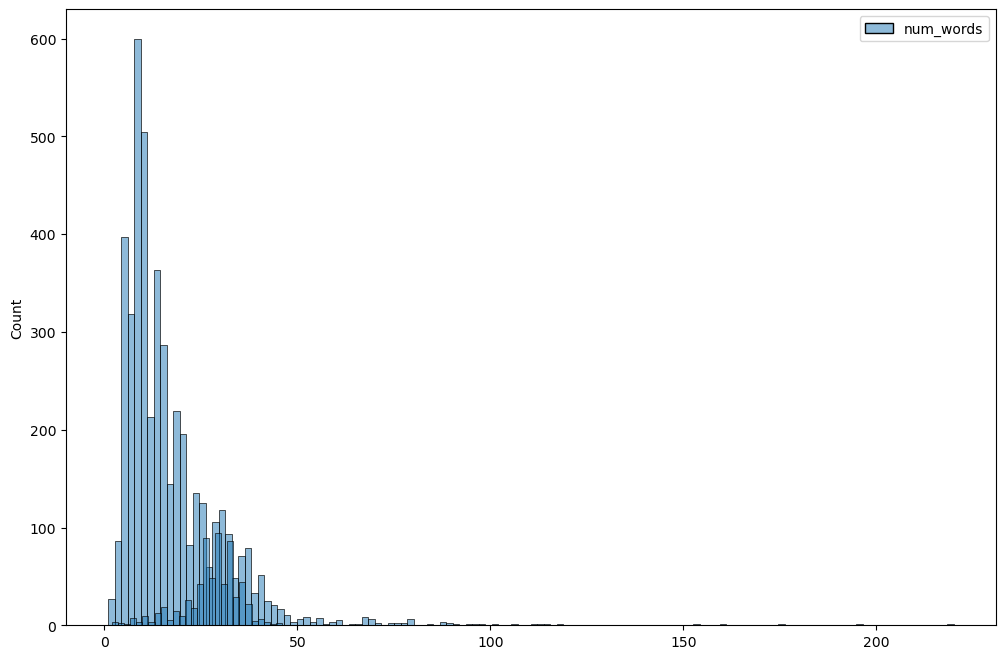

In [200]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target'] == 0][['num_words']],color='blue')
sns.histplot(df[df['target'] == 1][['num_words']],color='red')

/media/somil/Ubuntu1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/media/somil/Ubuntu1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/media/somil/Ubuntu1/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


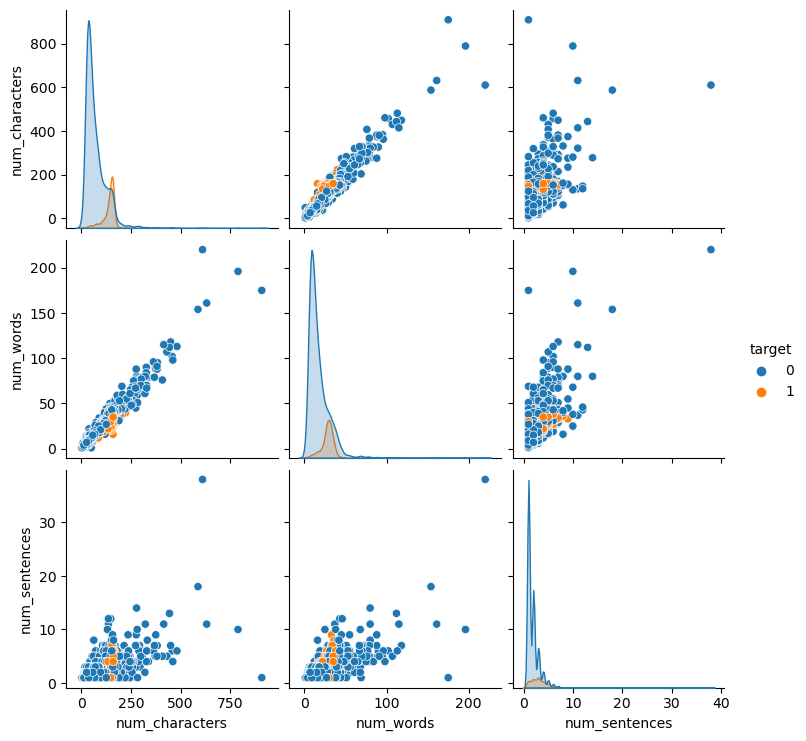

In [201]:
sns.pairplot(df,hue='target')

<Axes: >

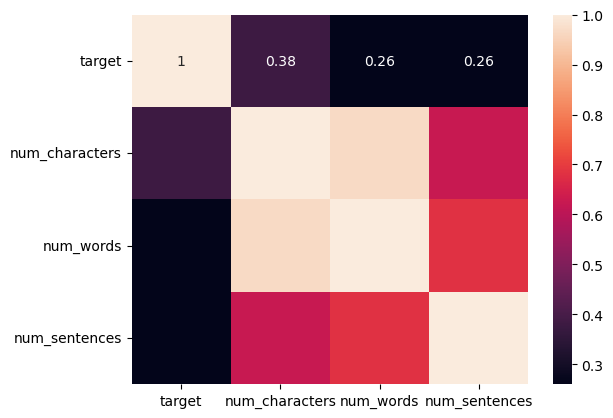

In [202]:
sns.heatmap(df.drop(columns=['text']).corr(),annot=True)

In [203]:
df.drop(columns=['text']).corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.379060,0.260934,0.260558
num_characters,0.379060,1.000000,0.966437,0.623447
num_words,0.260934,0.966437,1.000000,0.680016
num_sentences,0.260558,0.623447,0.680016,1.000000


# 3. Data Preprocessing
    1. Lower Case
    2. Tokenization
    3. Removing Special Characters
    4. Removing Stop words and punctuations
    5. Stemming

In [204]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [205]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)


    text = y[:]
    y.clear()



    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [206]:
transform_text('Hi, how are you? I Loved the yt lectures on machine learning')

'hi love yt lectur machin learn'

In [207]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [208]:
df['transformed_text'] = df['text'].apply(transform_text) 

In [209]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [210]:
from wordcloud import WordCloud

In [211]:
wc = WordCloud(width=1500,height=1500,min_font_size=10,background_color='white')

In [212]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

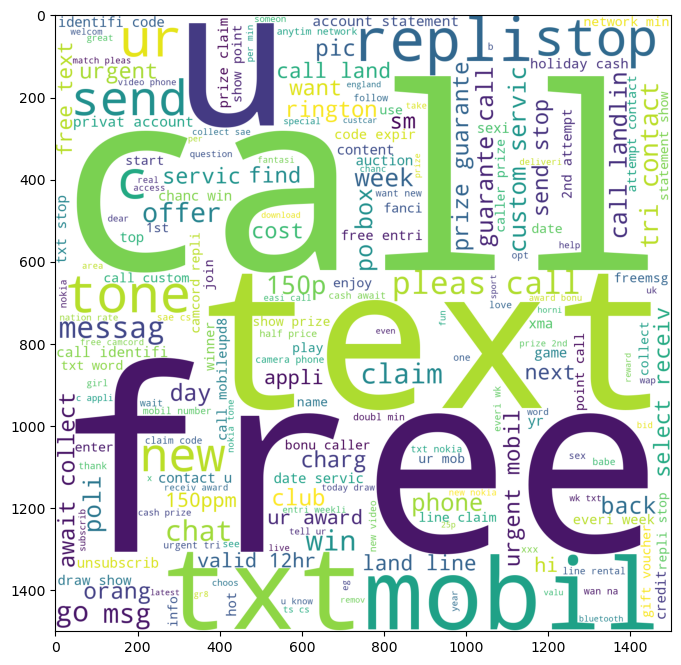

In [213]:
plt.figure(figsize=(15,8))
plt.imshow(spam_wc)

In [214]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

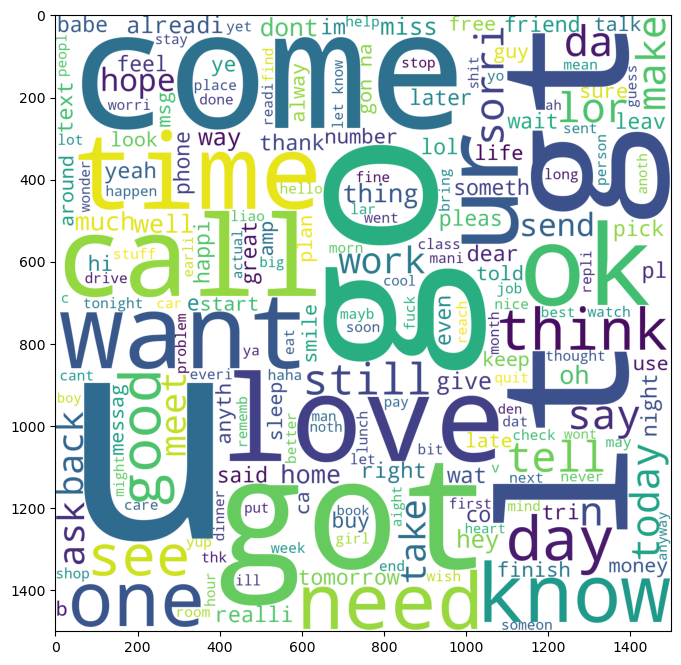

In [215]:
plt.figure(figsize=(15,8))
plt.imshow(ham_wc)

In [216]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [217]:
len(spam_corpus)

10029

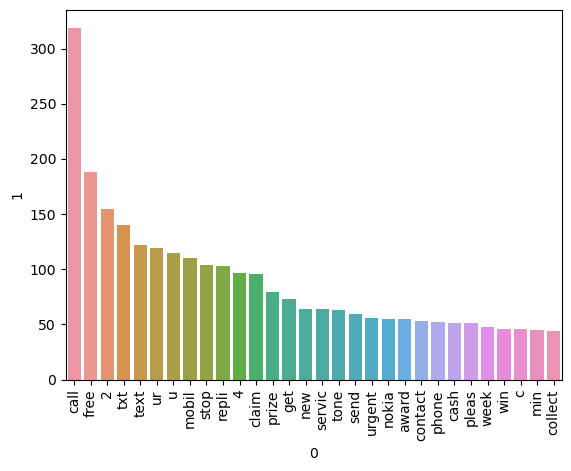

In [218]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [219]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for words in msg.split():
        ham_corpus.append(words)

In [220]:
len(ham_corpus)

35333

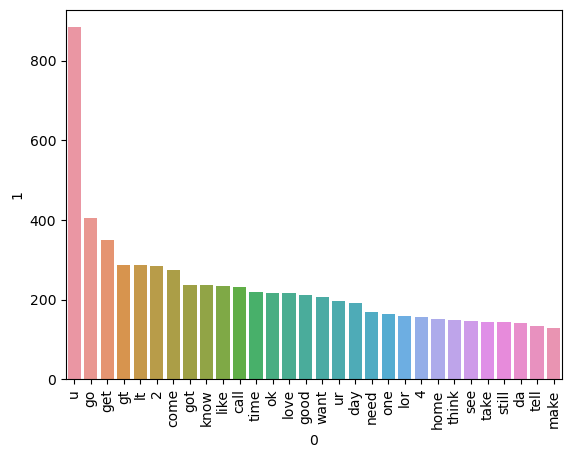

In [221]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model Building

In [222]:
# text vectorixation using bow

In [223]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [224]:
cv = CountVectorizer()

In [225]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [226]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [227]:
X.shape

(5162, 6700)

In [228]:
y = df['target'].values

In [229]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [232]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [233]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [234]:
gnb.fit(x_train,y_train)

GaussianNB()

In [235]:
y_pred1 = gnb.predict(x_test)

In [236]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [237]:
print("Accuracy Score: gnb- ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix: gnb- ")
print(confusion_matrix(y_test,y_pred1))
print("presicion score: gnb- ",precision_score(y_test,y_pred1))

Accuracy Score: gnb-  0.872216844143272
Confusion Matrix: gnb- 
[[797 118]
 [ 14 104]]
presicion score: gnb-  0.46846846846846846


In [238]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [239]:
y_pred2 = mnb.predict(x_test)

In [240]:
print("Accuracy Score: mnb- ",accuracy_score(y_test,y_pred2))
print("Confusion Matrix: mnb- ")
print(confusion_matrix(y_test,y_pred2))
print("presicion score: mnb- ",precision_score(y_test,y_pred2))

Accuracy Score: mnb-  0.9796708615682478
Confusion Matrix: mnb- 
[[904  11]
 [ 10 108]]
presicion score: mnb-  0.907563025210084


In [241]:
bnb.fit(x_train,y_train)

BernoulliNB()

In [242]:
y_pred3 = bnb.predict(x_test)

In [243]:
print("Accuracy Score: bnb- ",accuracy_score(y_test,y_pred3))
print("Confusion Matrix: bnb- ")
print(confusion_matrix(y_test,y_pred3))
print("presicion score: bnb- ",precision_score(y_test,y_pred3))

Accuracy Score: bnb-  0.9699903194578896
Confusion Matrix: bnb- 
[[910   5]
 [ 26  92]]
presicion score: bnb-  0.9484536082474226


In [244]:
tfidf = TfidfVectorizer()

In [245]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [246]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [247]:
X.shape

(5162, 6700)

In [248]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [249]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print("Accuracy Score: gnb- ",accuracy_score(y_test,y_pred1))
print("Confusion Matrix: gnb- ")
print(confusion_matrix(y_test,y_pred1))
print("presicion score: gnb- ",precision_score(y_test,y_pred1))

Accuracy Score: gnb-  0.8693126815101646
Confusion Matrix: gnb- 
[[797 118]
 [ 17 101]]
presicion score: gnb-  0.4611872146118721


In [250]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print("Accuracy Score: mnb- ",accuracy_score(y_test,y_pred2))
print("Confusion Matrix: mnb- ")
print(confusion_matrix(y_test,y_pred2))
print("presicion score: mnb- ",precision_score(y_test,y_pred2))

Accuracy Score: mnb-  0.9593417231364957
Confusion Matrix: mnb- 
[[915   0]
 [ 42  76]]
presicion score: mnb-  1.0


In [251]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print("Accuracy Score: bnb- ",accuracy_score(y_test,y_pred3))
print("Confusion Matrix: bnb- ")
print(confusion_matrix(y_test,y_pred3))
print("presicion score: bnb- ",precision_score(y_test,y_pred3))

Accuracy Score: bnb-  0.9699903194578896
Confusion Matrix: bnb- 
[[910   5]
 [ 26  92]]
presicion score: bnb-  0.9484536082474226


# we choose tfidf with mnb